In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [3]:
df1=pd.read_csv(r"C:\Users\THINKBOOK\Downloads\onlinepaymentfraud\data\PS_20174392719_1491204439457_log.csv")

In [4]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df1.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [7]:
df1["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
fraud = df1[df1['isFraud'] == 1]
legit = df1[df1['isFraud'] == 0]
fraud_sample = fraud.sample(n=3000, random_state=42)
legit_sample = legit.sample(n=3000, random_state=42)
df = pd.concat([fraud_sample, legit_sample])
# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df['isFraud'].value_counts())
print(df.shape)

isFraud
1    3000
0    3000
Name: count, dtype: int64
(6000, 10)


In [9]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,570,CASH_OUT,3712.11,C437016354,3712.11,0.00,C1109457703,185441.34,189153.45,1
1,167,PAYMENT,14053.06,C1143884920,895.00,0.00,M1604995755,0.00,0.00,0
2,99,CASH_OUT,130653.37,C2001925235,130653.37,0.00,C238467459,89246.77,219900.14,1
3,661,TRANSFER,10000000.00,C1058583308,12140888.35,2140888.35,C2061400193,0.00,0.00,1
4,204,PAYMENT,16004.58,C348311396,0.00,0.00,M866154596,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
5995,394,PAYMENT,8698.57,C1407139053,0.00,0.00,M655583214,0.00,0.00,0
5996,34,PAYMENT,30666.05,C1284241396,0.00,0.00,M423433106,0.00,0.00,0
5997,205,PAYMENT,14918.24,C144539116,94.00,0.00,M276091097,0.00,0.00,0
5998,382,TRANSFER,597115.18,C397805204,0.00,0.00,C2001594336,3753349.70,4350464.89,0


In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,570,CASH_OUT,3712.11,C437016354,3712.11,0.00,C1109457703,185441.34,189153.45,1
1,167,PAYMENT,14053.06,C1143884920,895.00,0.00,M1604995755,0.00,0.00,0
2,99,CASH_OUT,130653.37,C2001925235,130653.37,0.00,C238467459,89246.77,219900.14,1
3,661,TRANSFER,10000000.00,C1058583308,12140888.35,2140888.35,C2061400193,0.00,0.00,1
4,204,PAYMENT,16004.58,C348311396,0.00,0.00,M866154596,0.00,0.00,0


In [11]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
5995,394,PAYMENT,8698.57,C1407139053,0.00,0.0,M655583214,0.0,0.00,0
5996,34,PAYMENT,30666.05,C1284241396,0.00,0.0,M423433106,0.0,0.00,0
5997,205,PAYMENT,14918.24,C144539116,94.00,0.0,M276091097,0.0,0.00,0
5998,382,TRANSFER,597115.18,C397805204,0.00,0.0,C2001594336,3753349.7,4350464.89,0
5999,274,TRANSFER,379057.93,C1259154516,379057.93,0.0,C605861761,0.0,0.00,1


In [12]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [13]:
df.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.145572,0.082243,-0.014471,-0.025471,0.025199,0.304855
amount,0.145572,1.000000,0.662276,0.103680,-0.008771,0.329627,0.358670
oldbalanceOrg,0.082243,0.662276,1.000000,0.803289,0.015456,0.174994,0.137992
newbalanceOrig,-0.014471,0.103680,0.803289,1.000000,0.056162,0.006143,-0.139424
oldbalanceDest,-0.025471,-0.008771,0.015456,0.056162,1.000000,0.872100,-0.101395
newbalanceDest,0.025199,0.329627,0.174994,0.006143,0.872100,1.000000,0.028713
isFraud,0.304855,0.358670,0.137992,-0.139424,-0.101395,0.028713,1.000000


<Axes: >

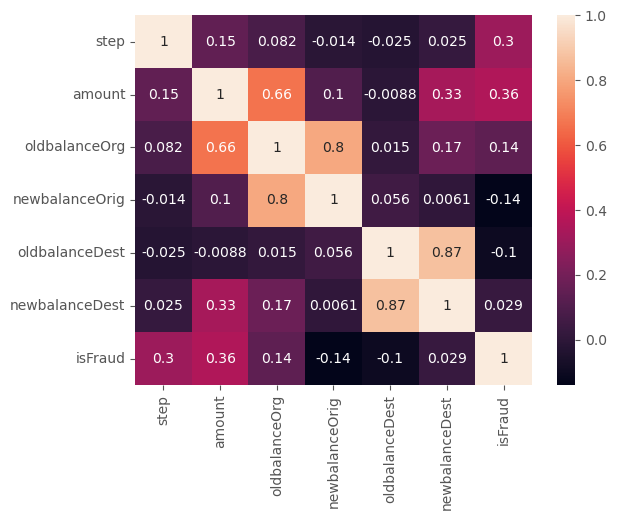

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='step', ylabel='Count'>

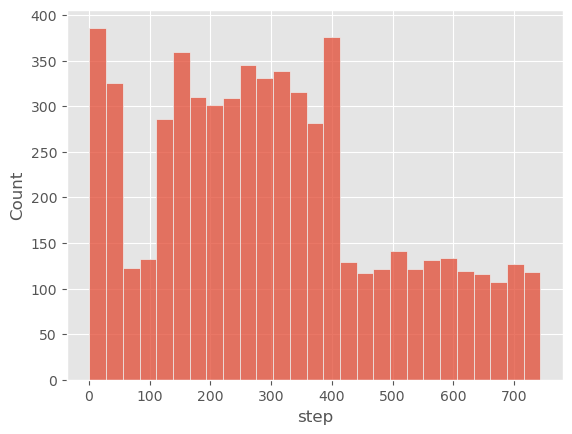

In [15]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

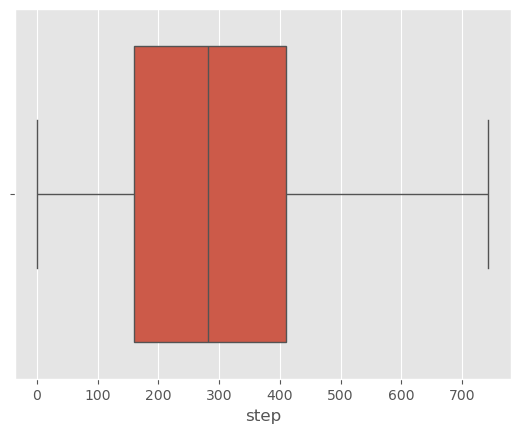

In [16]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

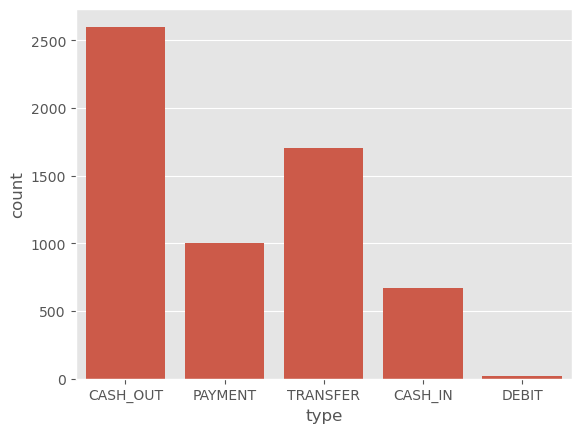

In [17]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

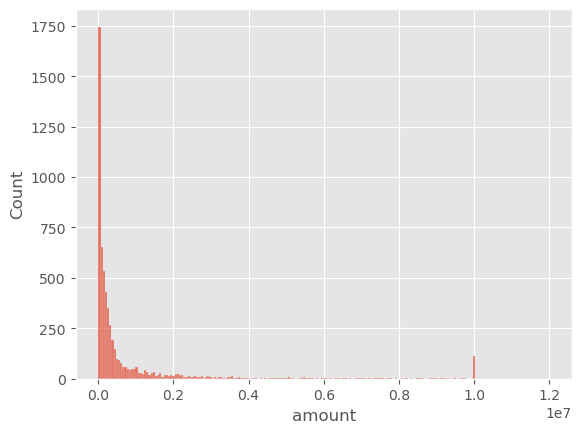

In [18]:
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

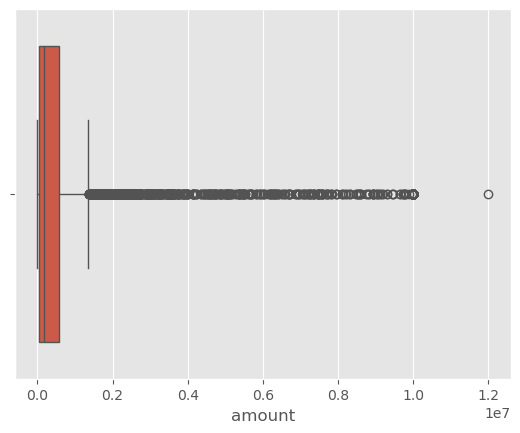

In [19]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

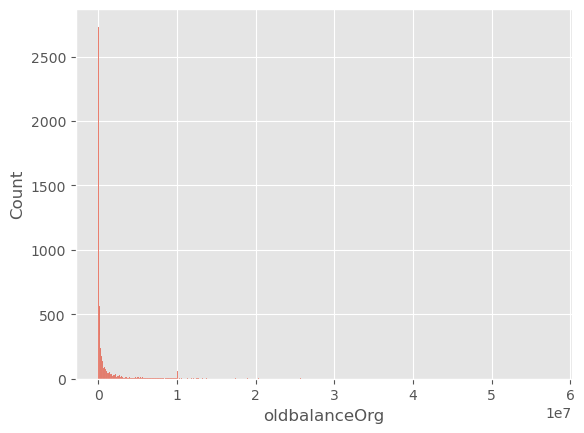

In [20]:
sns.histplot(data=df,x='oldbalanceOrg')

In [21]:
df['nameDest'].value_counts()

nameDest
C1780714769    2
C1193568854    2
C423248942     2
C350073748     2
C904300960     2
              ..
C1963312521    1
C2022229062    1
C1897901588    1
C1765086127    1
C605861761     1
Name: count, Length: 5972, dtype: int64

<Axes: xlabel='oldbalanceDest'>

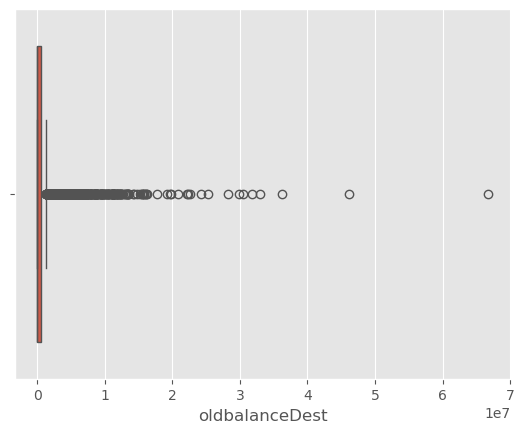

In [22]:
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

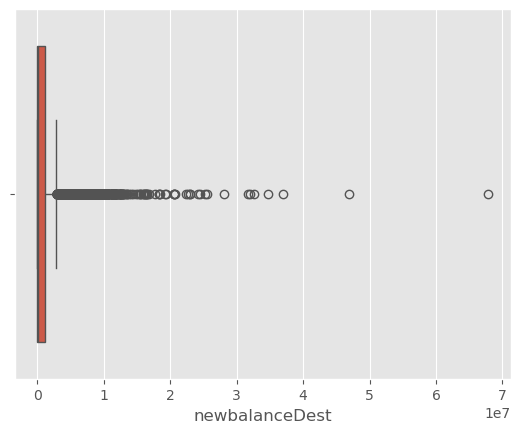

In [23]:
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

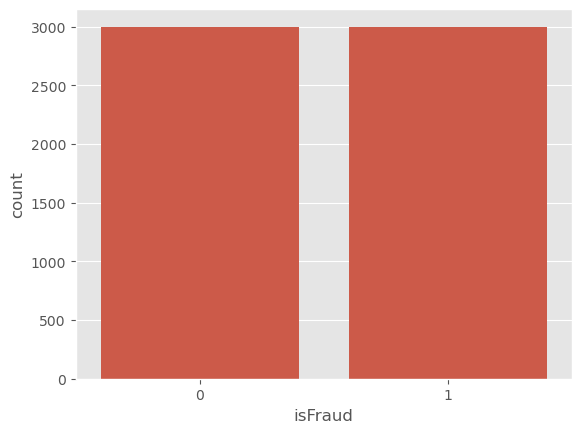

In [24]:
sns.countplot(data=df,x='isFraud')

In [25]:
df['isFraud'].value_counts()

isFraud
1    3000
0    3000
Name: count, dtype: int64

In [26]:
df.loc[df['isFraud']==0,'isFraud'] = 'is not Fraud'
df.loc[df['isFraud'] ==1, 'isFraud']='is Fraud'

In [27]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,570,CASH_OUT,3712.11,C437016354,3712.11,0.00,C1109457703,185441.34,189153.45,is Fraud
1,167,PAYMENT,14053.06,C1143884920,895.00,0.00,M1604995755,0.00,0.00,is not Fraud
2,99,CASH_OUT,130653.37,C2001925235,130653.37,0.00,C238467459,89246.77,219900.14,is Fraud
3,661,TRANSFER,10000000.00,C1058583308,12140888.35,2140888.35,C2061400193,0.00,0.00,is Fraud
4,204,PAYMENT,16004.58,C348311396,0.00,0.00,M866154596,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
5995,394,PAYMENT,8698.57,C1407139053,0.00,0.00,M655583214,0.00,0.00,is not Fraud
5996,34,PAYMENT,30666.05,C1284241396,0.00,0.00,M423433106,0.00,0.00,is not Fraud
5997,205,PAYMENT,14918.24,C144539116,94.00,0.00,M276091097,0.00,0.00,is not Fraud
5998,382,TRANSFER,597115.18,C397805204,0.00,0.00,C2001594336,3753349.70,4350464.89,is not Fraud


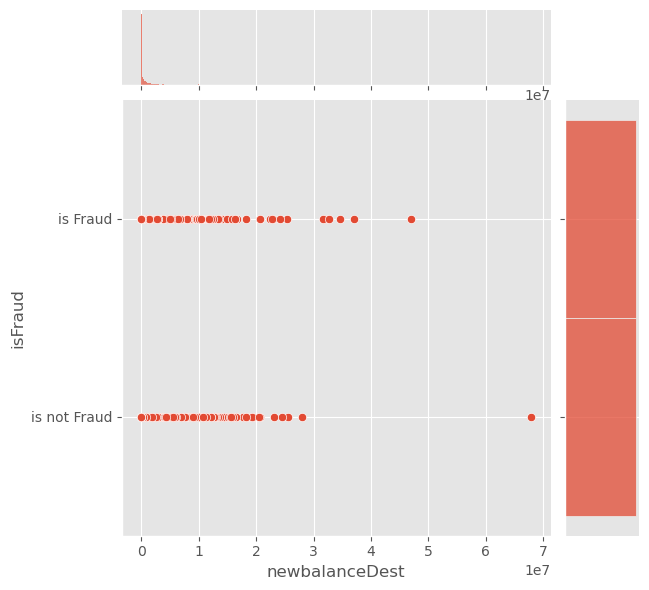

In [28]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

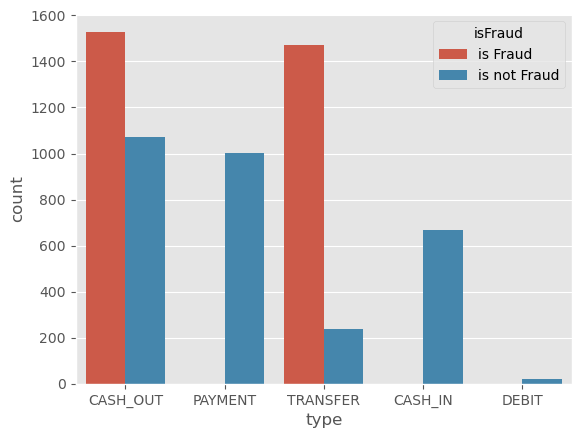

In [29]:
sns.countplot(data=df,x= 'type', hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

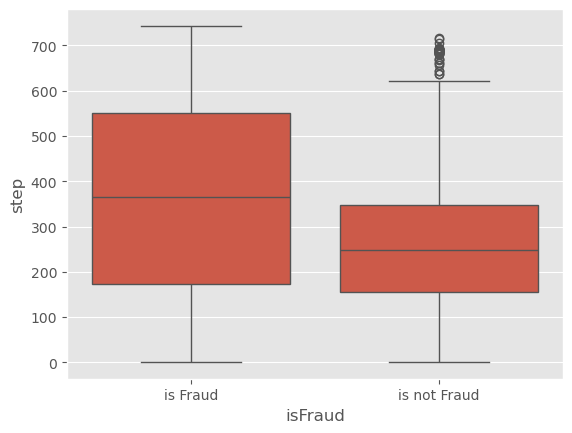

In [30]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

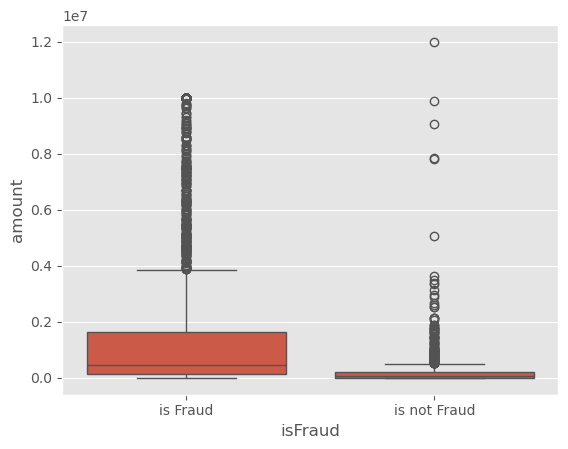

In [31]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

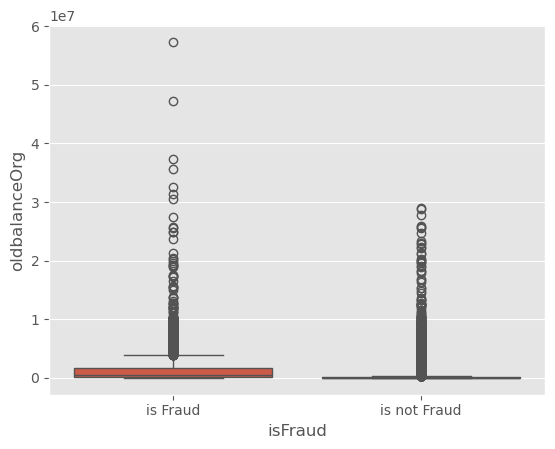

In [32]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

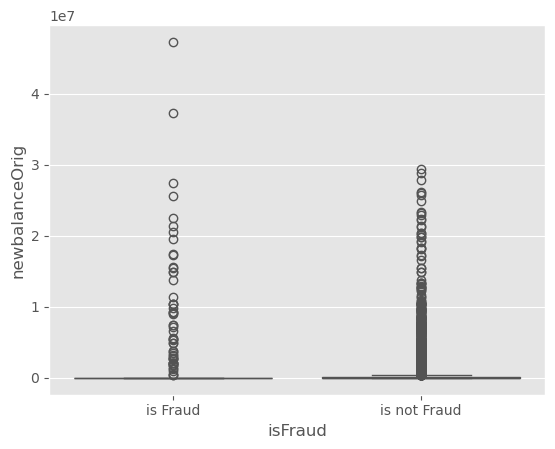

In [33]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

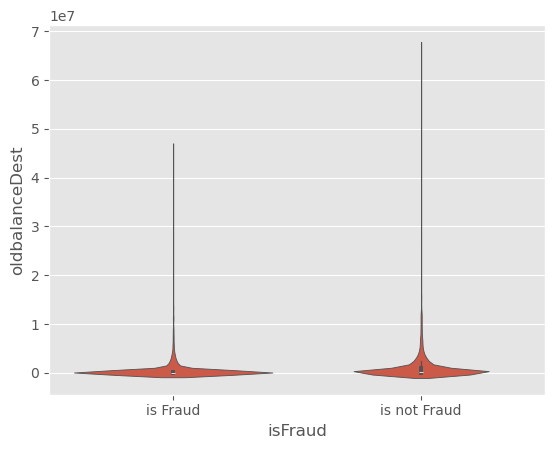

In [34]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

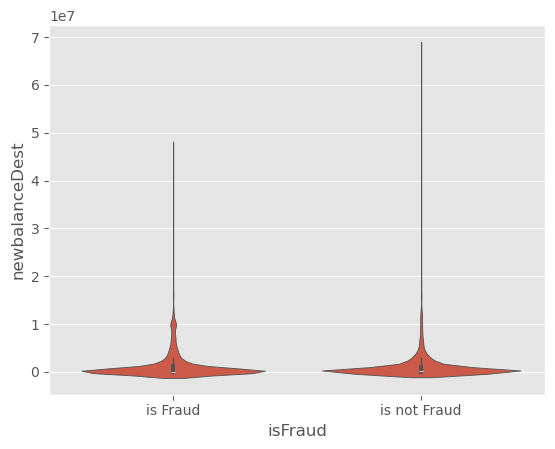

In [35]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

In [36]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6000.000000,6000,6.000000e+03,6000,6.000000e+03,6.000000e+03,6000,6.000000e+03,6.000000e+03,6000
unique,NaN,5,NaN,6000,NaN,NaN,5972,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C437016354,NaN,NaN,C1780714769,NaN,NaN,is Fraud
freq,NaN,2600,NaN,1,NaN,NaN,2,NaN,NaN,3000
mean,305.504667,NaN,8.593177e+05,NaN,1.266455e+06,5.135294e+05,NaN,8.078637e+05,1.255958e+06,NaN
std,192.562291,NaN,1.898238e+06,NaN,3.184603e+06,2.421964e+06,NaN,2.471325e+06,2.946543e+06,NaN
min,1.000000,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,160.000000,NaN,3.967690e+04,NaN,1.078950e+04,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,282.000000,NaN,1.809860e+05,NaN,1.292748e+05,0.000000e+00,NaN,0.000000e+00,1.353331e+05,NaN
75%,410.000000,NaN,5.684078e+05,NaN,8.431740e+05,0.000000e+00,NaN,5.229466e+05,1.144464e+06,NaN


In [37]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            6000 non-null   int64  
 1   type            6000 non-null   object 
 2   amount          6000 non-null   float64
 3   nameOrig        6000 non-null   object 
 4   oldbalanceOrg   6000 non-null   float64
 5   newbalanceOrig  6000 non-null   float64
 6   nameDest        6000 non-null   object 
 7   oldbalanceDest  6000 non-null   float64
 8   newbalanceDest  6000 non-null   float64
 9   isFraud         6000 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 468.9+ KB


<Axes: ylabel='amount'>

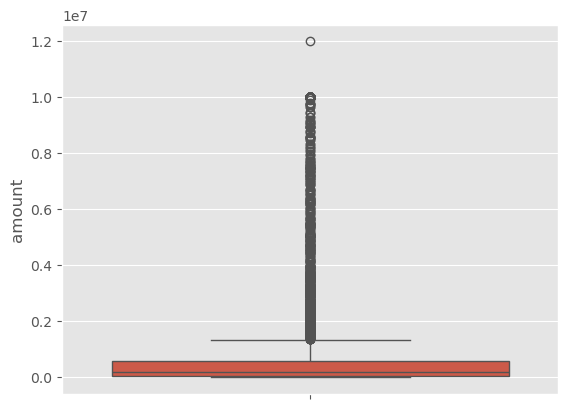

In [39]:
sns.boxplot (df['amount']) 

In [40]:
from scipy import stats 
print(stats.mode (df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=10000000.0, count=109)
859317.68821


In [41]:
q1=np.quantile (df['amount'], 0.25)
q3=np.quantile(df['amount'], 0.75)
IQR=q3-q1
upper_bound=q3+(1.5*IQR)
lower_bound=q1-(1.5*IQR)
print('q1',q1)
print('q3',q3)
print('IQR', IQR)
print('Upper Bound :',upper_bound)
print('Lower Bound :',lower_bound)
print('Skewed data :',len(df[df['amount']>upper_bound]))
print('Skewed data :',len(df[df['amount']<lower_bound]))

q1 39676.905
q3 568407.765
IQR 528730.86
Upper Bound : 1361504.0550000002
Lower Bound : -753419.385
Skewed data : 895
Skewed data : 0


In [43]:
df['amount']=np.log(df['amount'])

In [44]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
df['type'] = la.fit_transform(df['type'])
df['type'].value_counts()

type
1    2600
4    1707
3    1004
0     669
2      20
Name: count, dtype: int64

In [45]:
x = df.drop('isFraud', axis=1)
y=df['isFraud']

In [46]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,570,1,8.219356,C437016354,3712.11,0.00,C1109457703,185441.34,189153.45
1,167,3,9.550595,C1143884920,895.00,0.00,M1604995755,0.00,0.00
2,99,1,11.780303,C2001925235,130653.37,0.00,C238467459,89246.77,219900.14
3,661,4,16.118096,C1058583308,12140888.35,2140888.35,C2061400193,0.00,0.00
4,204,3,9.680630,C348311396,0.00,0.00,M866154596,0.00,0.00
...,...,...,...,...,...,...,...,...,...
5995,394,3,9.070914,C1407139053,0.00,0.00,M655583214,0.00,0.00
5996,34,3,10.330911,C1284241396,0.00,0.00,M423433106,0.00,0.00
5997,205,3,9.610340,C144539116,94.00,0.00,M276091097,0.00,0.00
5998,382,4,13.299865,C397805204,0.00,0.00,C2001594336,3753349.70,4350464.89


In [47]:
y

0           is Fraud
1       is not Fraud
2           is Fraud
3           is Fraud
4       is not Fraud
            ...     
5995    is not Fraud
5996    is not Fraud
5997    is not Fraud
5998    is not Fraud
5999        is Fraud
Name: isFraud, Length: 6000, dtype: object

In [48]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')


In [49]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(4800, 9)
(1200, 9)
(1200,)
(4800,)


In [52]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')
x_train = x_train.replace([np.inf, -np.inf], np.nan)
x_test = x_test.replace([np.inf, -np.inf], np.nan)
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)

In [53]:
print("NaN values:\n", x_train.isnull().sum())
print("Infinity values:\n", np.isinf(x_train.values).sum())

NaN values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
dtype: int64
Infinity values:
 0


In [54]:
df['amount'] = np.log1p(df['amount'])

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_test_predict1 = rfc.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_test_predict1))

Accuracy: 0.9908333333333333


In [56]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score (y_train,y_train_predict1)
train_accuracy

1.0

In [57]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,571,3
is not Fraud,8,618


In [58]:
print(classification_report (y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.99      0.99      0.99       574
is not Fraud       1.00      0.99      0.99       626

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [59]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_test_predict2=dtc.predict(x_test) 
test_accuracy=accuracy_score (y_test,y_test_predict2)
test_accuracy

0.9841666666666666

In [60]:
y_train_predict2=dtc.predict(x_train) 
train_accuracy=accuracy_score (y_train,y_train_predict2)
train_accuracy

1.0

In [61]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,564,10
is not Fraud,9,617


In [62]:
print(classification_report (y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.98      0.98      0.98       574
is not Fraud       0.98      0.99      0.98       626

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



In [63]:
from sklearn.ensemble import ExtraTreesClassifier 
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score (y_test,y_test_predict3)
test_accuracy

0.9858333333333333

In [64]:
y_train_predict3=etc.predict(x_train) 
train_accuracy=accuracy_score (y_train,y_train_predict3)
train_accuracy

1.0

In [65]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,570,4
is not Fraud,13,613


In [66]:
print(classification_report (y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       0.98      0.99      0.99       574
is not Fraud       0.99      0.98      0.99       626

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [67]:
y_train1 = y_train.map({'is not Fraud':0, 'is Fraud':1})
y_test1 = y_test.map({'is not Fraud':0, 'is Fraud':1})

In [68]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier() 
xgb1.fit(x_train, y_train1)
y_test_predict5=xgb1.predict(x_test) 
test_accuracy=accuracy_score (y_test1,y_test_predict5)
test_accuracy

0.9908333333333333

In [69]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score (y_train1,y_train_predict5)
train_accuracy

1.0

In [70]:
pd.crosstab(y_test,y_test_predict5)

col_0,0,1
isFraud,,
is Fraud,3,571
is not Fraud,618,8


In [71]:
y_train_predict5=xgb1.predict(x_train) 
train_accuracy=accuracy_score (y_train1,y_train_predict5)
train_accuracy

1.0

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test) 
test_accuracy=accuracy_score (y_test,y_test_predict4)
test_accuracy

0.8316666666666667

In [73]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score (y_train,y_train_predict4)
train_accuracy


0.8166666666666667

In [74]:
pd.crosstab(y_test,y_test_predict4)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,377,197
is not Fraud,5,621


In [75]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report (y_test,y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       0.99      0.66      0.79       574
is not Fraud       0.76      0.99      0.86       626

    accuracy                           0.83      1200
   macro avg       0.87      0.82      0.82      1200
weighted avg       0.87      0.83      0.83      1200



In [76]:
df.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'type_1',
       'type_2', 'type_3', 'type_4'],
      dtype='object')

In [77]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder()
y_train1=la.fit_transform(y_train)

In [78]:
y_test1=la.transform(y_test)

In [79]:
y_test1

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
y_train1

array([0, 1, 0, ..., 0, 0, 0])

In [82]:
def compareModel():
    print("train accuracy for rfc", accuracy_score (y_train_predict1,y_train)) 
    print("test accuracy for rfc", accuracy_score (y_test_predict1,y_test)) 
    print("train accuracy for dtc", accuracy_score (y_train_predict2,y_train))
    print("test accuracy for dtc", accuracy_score (y_test_predict2,y_test)) 
    print("train accuracy for etc", accuracy_score (y_train_predict3,y_train)) 
    print("test accuracy for etc", accuracy_score (y_test_predict3,y_test)) 
    print("train accuracy for svc", accuracy_score (y_train_predict4,y_train)) 
    print("test accuracy for svcc", accuracy_score (y_test_predict4,y_test))
    print("train accuracy for xgb1", accuracy_score (y_train_predict5,y_train1))
    print("test accuracy for xgb1", accuracy_score (y_test_predict5,y_test1))
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.9908333333333333
train accuracy for dtc 1.0
test accuracy for dtc 0.9841666666666666
train accuracy for etc 1.0
test accuracy for etc 0.9858333333333333
train accuracy for svc 0.8166666666666667
test accuracy for svcc 0.8316666666666667
train accuracy for xgb1 0.0
test accuracy for xgb1 0.009166666666666667


In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score (y_test,y_test_predict4)
test_accuracy

0.8316666666666667

In [84]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score (y_train,y_train_predict4)
train_accuracy

0.8166666666666667

In [85]:
import pickle
pickle.dump(svc, open('payments.pkl', 'wb'))